In [169]:
import os
from PIL import Image
import numpy as np
from numpy import save, load
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import umap
import pandas as pd
import re
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import Layout
%matplotlib inline

In [146]:
import ipywidgets as widgets

## Get categorie names in a separate series to map to cluster colors

In [4]:
df = pd.read_excel('DIRTI_Supplementary.xlsx')

In [5]:
df['categorie'] = df.loc[:, 'name']

In [6]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [7]:
df

,categorie,name,disg_mean_all,disg_SD_all,disg_mean_women,disg_SD_women,disg_mean_men,disg_SD_men,sex_diff_disg,t_sex_diff_disg_df_198,p_sex_diff_disg,cohens_d_sex_diff_disg,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1001_food,1001_food,5.095,2.545264,5.392157,2.442028,4.785714,2.625215,0,1.692308,0.092160,0.239202,NaN,Variable,Description
1,1002_food,1002_food,5.085,2.588683,5.519608,2.488510,4.632653,2.625756,1,2.452593,0.015049,0.346730,NaN,name,picture number / name
2,1003_food,1003_food,5.205,2.578024,5.656863,2.483590,4.734694,2.602739,1,2.564015,0.011088,0.362507,NaN,disg_mean_all,mean disgust rating for the picture (all parti...
3,1004_food,1004_food,4.120,2.421761,4.558824,2.479913,3.663265,2.283711,1,2.653725,0.008607,0.375680,NaN,disg_SD_all,standard deviation for the disgust rating for...
4,1005_food,1005_food,5.145,2.584059,5.519608,2.508324,4.755102,2.616605,1,2.109645,0.036145,0.298281,NaN,disg_mean_women,mean disgust rating for the picture (women only)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1296_hygiene neutral,1296_hygiene neutral,1.135,0.623473,1.117647,0.601880,1.153061,0.647788,0,-0.400719,0.689059,-0.056639,NaN,NaN,NaN
296,1297_hygiene neutral,1297_hygiene neutral,1.090,0.439163,1.039216,0.195066,1.142857,0.592043,0,-1.675987,0.095319,-0.235134,NaN,NaN,NaN
297,1298_hygiene neutral,1298_hygiene neutral,1.110,0.556280,1.127451,0.608058,1.091837,0.499210,0,0.451709,0.651973,0.064020,NaN,NaN,NaN
298,1299_hygiene neutral,1299_hygiene neutral,1.050,0.279087,1.019608,0.139333,1.081633,0.370941,0,-1.577033,0.116384,-0.221368,NaN,NaN,NaN


In [8]:
df['categorie'].replace(to_replace=r'(\d*)_food', value='food', regex=True, inplace=True)

In [9]:
df['categorie'].replace(to_replace=r'(\d*)_food neutral', value='food_neutral', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_animals', value='animals', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_animals neutral', value='animals_neutral', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_body products', value='body_products', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_body products neutral', value='body_products_neutral', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_injuries_infections', value='injuries_infections', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_injuries_infections neutral', value='injuries_infections_neutral', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_death', value='death', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_death neutral', value='death_neutral', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_hygiene', value='hygiene', regex=True, inplace=True)
df['categorie'].replace(to_replace=r'(\d*)_hygiene neutral', value='hygiene_neutral', regex=True, inplace=True) 

## Get list of stim_names (numbered and sorted) and list of images (also sorted)
### Create categories and descriptions

In [11]:
stim_names = []

for i in os.listdir('/Documents/Stimuli/DIRTI/DIRTI Database'):
    stim_names.append(i)
    
stim_names.sort()

In [12]:
images = []

for i in stim_names:
    try:
        images.append(Image.open('/Documents/Stimuli/DIRTI/DIRTI Database/'+i).convert("RGB"))
    except IsADirectoryError:
        continue

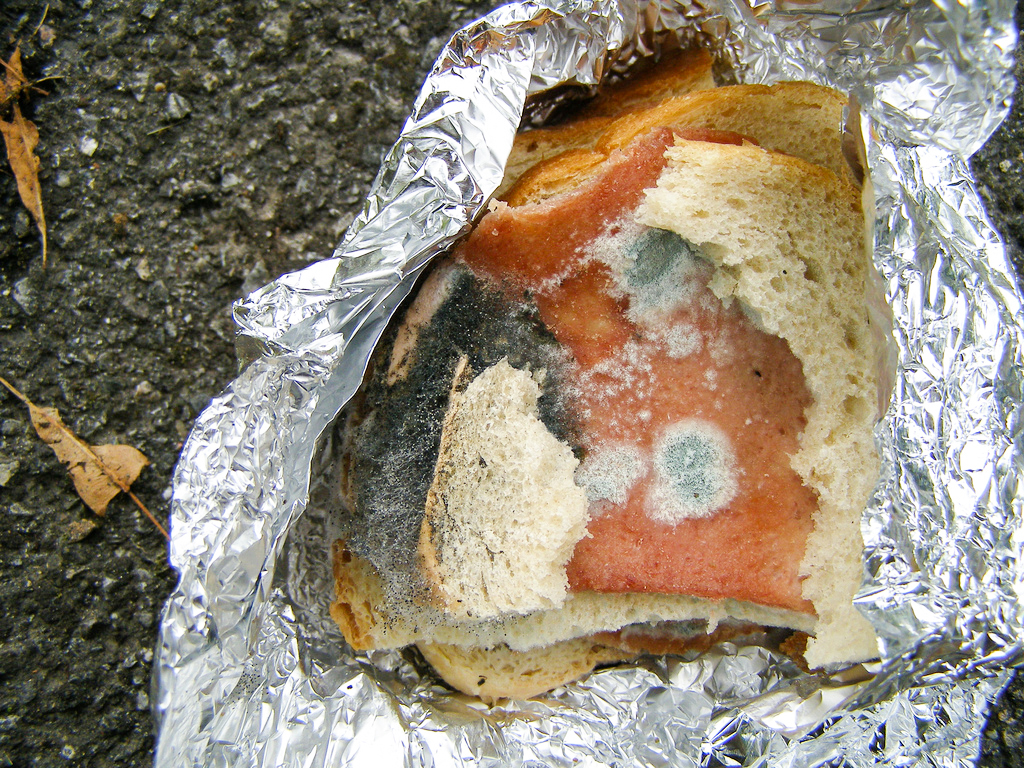

In [14]:
images[0]

In [15]:
categories = ['food', 'animals','body products','injuries/infections','death','hygiene']
descriptions = [f"This is a photo of {label}" for label in categories]

In [16]:
descriptions
# text_tokens = clip.tokenize(descriptions).cuda()

['This is a photo of food',
 'This is a photo of animals',
 'This is a photo of body products',
 'This is a photo of injuries/infections',
 'This is a photo of death',
 'This is a photo of hygiene']

## Model choice, image preprocessing, feature extraction and label prediction
### This part was run on a different machine to facilitate the use of the clip module

In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

import clip

clip.available_models()

# This is a model with the transformer
model, preprocess = clip.load("ViT-B/32")

# This is the ResNet 50 they used in the online microscope
# model, preprocess = clip.load("RN50x64")

model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

preprocess

import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

stim_names = []
original_images []
images = []

for i in os.listdir('/home/eclips/Documents/DeepProjections/DIRTI'):
    stim_names.append(i)
    
stim_names.sort()

for i in stim_names:
    original_images.append(Image.open('/home/eclips/Documents/DeepProjections/DIRTI/'+i).convert("RGB"))
    images.append(preprocess(Image.open('/home/eclips/Documents/DeepProjections/DIRTI/'+i).convert("RGB")))



image_input = torch.tensor(np.stack(images)).cuda()

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    


categories = ['food', 'animals','body products','injuries/infections','death','hygiene']
descriptions = [f"This is a photo of {label}" for label in categories]
text_tokens = clip.tokenize(descriptions).cuda()

with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cuda().topk(5, dim=-1)

print(top_probs)
print(top_labels)

# plt.figure(figsize=(20, 20))

# for i, image in enumerate(original_images):
#     plt.subplot(5, 4, 2 * i + 1)
#     plt.imshow(image)
#     plt.axis("off")

#     plt.subplot(5, 4, 2 * i + 2)
#     y = np.arange(top_probs.shape[-1])
#     plt.grid()
#     plt.barh(y, top_probs[i].cpu())
#     plt.gca().invert_yaxis()
#     plt.gca().set_axisbelow(True)
#     plt.yticks(y, [cifar100.classes[index] for index in top_labels[i].cpu()])
#     plt.xlabel("probability")

# plt.subplots_adjust(wspace=0.5)
# plt.show()

In [17]:
categories

['food', 'animals', 'body products', 'injuries/infections', 'death', 'hygiene']

## Start of visualization section
### scaled_image_features were imported from .npy file, calculated on another machine

In [125]:
scaled_image_features = load('scaled_image_features.npy')

In [126]:
scaled_image_features

array([[ 0.44392582,  0.13859033, -0.25852633, ..., -0.61127959,
        -1.61672898,  0.44855474],
       [ 1.65860979, -0.2556219 , -0.76501194, ...,  0.77258086,
        -0.25729883, -0.75964561],
       [-0.65822482, -0.18998421, -0.28929219, ..., -0.90856099,
         1.67859076,  0.60974221],
       ...,
       [-1.87001094,  0.17488411,  2.24878675, ..., -0.70243207,
        -0.24856086, -0.42456762],
       [ 0.41953554,  1.09149512, -0.34956816, ..., -0.10994092,
         0.18599897, -0.52082844],
       [-1.31169099,  1.93011311,  2.05958717, ..., -2.47705701,
        -0.13776718, -1.82105526]])

In [45]:
zero=0

In [43]:
one = 1
two = 2
three = 3
four = 4
five = 5
six = 6
seven = 7 
eight = 8
nine = 9
ten = 10
eleven = 11

In [127]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_image_features)
embedding.shape

(300, 2)

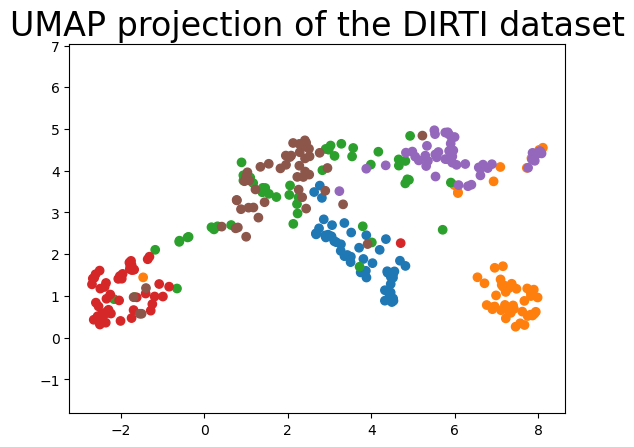

In [128]:
# reducer = umap.UMAP()

# # new_image_features = torch.Tensor.cpu(image_features)
# # scaled_image_features = StandardScaler().fit_transform(new_image_features)

# embedding = reducer.fit_transform(scaled_image_features)
# embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[int(x)] for x in df.categorie.map({'food':'0', 'food neutral':'0', 'animals':'1', 'animals neutral':'1', 'body_products':'2', 'body_products neutral':'2', 'injuries_infections':'3', 'injuries_infections neutral':'3', 'death':'4', 'death neutral':'4', 'hygiene':'5', 'hygiene neutral':'5'})])

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the DIRTI dataset', fontsize=24);

In [130]:
import umap.plot

In [134]:
mapper = umap.UMAP().fit(scaled_image_features)

In [184]:
hover_data = pd.DataFrame({'index':np.arange(300),
                           'label': df.categorie[:300]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'animals',
        '1':'animals neutral',
        '2':'body products',
        '3':'body products neutral',
        '4':'death',
        '5':'death neutral',
        '6':'food',
        '7':'food neutral',
        '8':'hygiene',
        '9':'hygiene neutral',
        '10':'injuries infections', 
        '11':'injuries infections neutral'
    }
)

<AxesSubplot:>

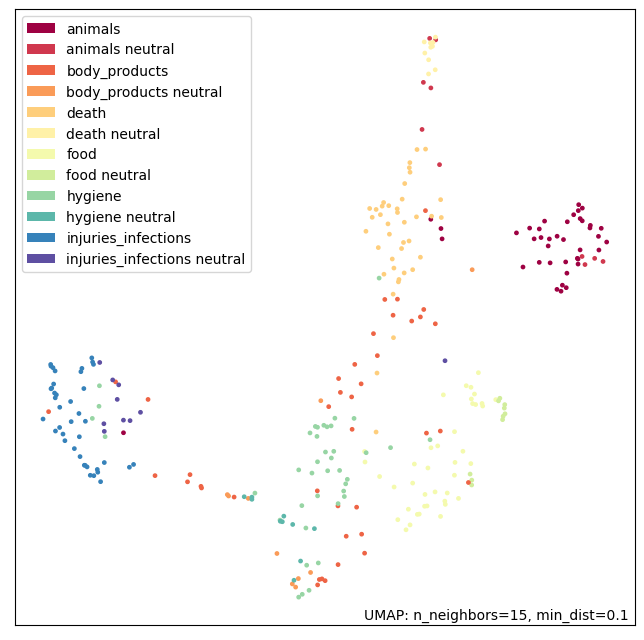

In [136]:
umap.plot.points(mapper, labels=df.categorie)

In [140]:
umap.plot.output_notebook()

Loading BokehJS ...

In [185]:
p = umap.plot.interactive(mapper, labels=df.categorie[:300], hover_data=hover_data, point_size=10)
umap.plot.show(p)

In [188]:
def browse_images(digits):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], interpolation='nearest')
        plt.title('DIRTI Image: %s' % i)
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(images)

interactive(children=(IntSlider(value=149, description='i', max=299), Output()), _dom_classes=('widget-interac…